In [13]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
%matplotlib inline

plt.style.use("bmh")
sns.set(style="whitegrid")

### 2. Loading and preprosessing the dataset

##### 2.1 Reading the data

In [79]:
df = pd.read_csv("./rents_basel.csv")
df

,id,categories,living_space (m2),num_rooms,floor,num_floors,price (CHF),year_built,is_new_building,is_old_building,year_last_renovated,latitude,longitude,city,street,postal_code
0,4001752512,"['APARTMENT', 'TERRACE_FLAT']",230.0,6.5,1.0,4.0,4090.0,2018.0,True,NaN,NaN,47.304543,7.816949,Härkingen,Länggasse 43,4624
1,4001782897,"['HOUSE', 'SINGLE_HOUSE']",270.0,7.5,NaN,2.0,6520.0,2005.0,NaN,NaN,NaN,47.515769,8.189306,Remigen,Leestrasse 7,5236
2,4001808482,"['APARTMENT', 'FLAT']",100.0,4.5,NaN,5.0,2150.0,1945.0,NaN,True,2020.0,47.544604,7.574453,Basel,Holeestrasse 10,4054
3,4001779898,['APARTMENT'],147.0,3.0,4.0,4.0,3510.0,1932.0,True,NaN,2023.0,47.544895,7.581845,Basel,Margarethenstrasse 84,4053
4,4001776871,"['APARTMENT', 'FLAT']",140.0,6.5,3.0,NaN,4490.0,NaN,NaN,True,2024.0,47.531729,7.571826,Binningen,Blumenstrasse 12,4102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4001708992,"['APARTMENT', 'DUPLEX']",150.0,5.5,5.0,NaN,5190.0,2021.0,NaN,NaN,NaN,47.553724,7.585539,Basel,Steinengraben 36,4051
996,4001707395,"['APARTMENT', 'FLAT']",90.0,4.5,1.0,NaN,1720.0,2009.0,NaN,NaN,NaN,47.144594,7.282564,Biel/Bienne,Löhrenweg 17,2504
997,4001707386,"['APARTMENT', 'FLAT']",75.0,3.0,5.0,NaN,2120.0,NaN,NaN,NaN,NaN,47.569194,7.594386,Basel,Amerbachstrasse 62,4057
998,4001707312,['APARTMENT'],NaN,5.5,1.0,NaN,2440.0,NaN,NaN,NaN,NaN,47.503447,7.602525,Reinach BL,Dornacherweg 100,4153


##### 2.2 Preprosessing

In [80]:
df.rename(
{
    'living_space (m2)':'sizes',
    'num_rooms':'rooms',
    'price (CHF)':'prices',
},
axis=1, inplace=True)

df.head()

,id,categories,sizes,rooms,floor,num_floors,prices,year_built,is_new_building,is_old_building,year_last_renovated,latitude,longitude,city,street,postal_code
0,4001752512,"['APARTMENT', 'TERRACE_FLAT']",230.0,6.5,1.0,4.0,4090.0,2018.0,True,NaN,NaN,47.304543,7.816949,Härkingen,Länggasse 43,4624
1,4001782897,"['HOUSE', 'SINGLE_HOUSE']",270.0,7.5,NaN,2.0,6520.0,2005.0,NaN,NaN,NaN,47.515769,8.189306,Remigen,Leestrasse 7,5236
2,4001808482,"['APARTMENT', 'FLAT']",100.0,4.5,NaN,5.0,2150.0,1945.0,NaN,True,2020.0,47.544604,7.574453,Basel,Holeestrasse 10,4054
3,4001779898,['APARTMENT'],147.0,3.0,4.0,4.0,3510.0,1932.0,True,NaN,2023.0,47.544895,7.581845,Basel,Margarethenstrasse 84,4053
4,4001776871,"['APARTMENT', 'FLAT']",140.0,6.5,3.0,NaN,4490.0,NaN,NaN,True,2024.0,47.531729,7.571826,Binningen,Blumenstrasse 12,4102


##### 2.3 Cleaning Dataset

In [81]:
df.drop("id", axis=1, inplace=True)
df.head()

,categories,sizes,rooms,floor,num_floors,prices,year_built,is_new_building,is_old_building,year_last_renovated,latitude,longitude,city,street,postal_code
0,"['APARTMENT', 'TERRACE_FLAT']",230.0,6.5,1.0,4.0,4090.0,2018.0,True,NaN,NaN,47.304543,7.816949,Härkingen,Länggasse 43,4624
1,"['HOUSE', 'SINGLE_HOUSE']",270.0,7.5,NaN,2.0,6520.0,2005.0,NaN,NaN,NaN,47.515769,8.189306,Remigen,Leestrasse 7,5236
2,"['APARTMENT', 'FLAT']",100.0,4.5,NaN,5.0,2150.0,1945.0,NaN,True,2020.0,47.544604,7.574453,Basel,Holeestrasse 10,4054
3,['APARTMENT'],147.0,3.0,4.0,4.0,3510.0,1932.0,True,NaN,2023.0,47.544895,7.581845,Basel,Margarethenstrasse 84,4053
4,"['APARTMENT', 'FLAT']",140.0,6.5,3.0,NaN,4490.0,NaN,NaN,True,2024.0,47.531729,7.571826,Binningen,Blumenstrasse 12,4102


### 3. Descriptive Analysis

##### 3.1 Dimension Dataset

In [82]:
df.shape

(1000, 15)

##### 3.2 General Information Dataset

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   categories           1000 non-null   object 
 1   sizes                881 non-null    float64
 2   rooms                997 non-null    float64
 3   floor                795 non-null    float64
 4   num_floors           132 non-null    float64
 5   prices               991 non-null    float64
 6   year_built           604 non-null    float64
 7   is_new_building      122 non-null    object 
 8   is_old_building      97 non-null     object 
 9   year_last_renovated  336 non-null    float64
 10  latitude             1000 non-null   float64
 11  longitude            1000 non-null   float64
 12  city                 1000 non-null   object 
 13  street               999 non-null    object 
 14  postal_code          1000 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memo

In [84]:
df.describe()

,sizes,rooms,floor,num_floors,prices,year_built,year_last_renovated,latitude,longitude,postal_code
count,881.000000,997.000000,795.000000,132.000000,991.000000,604.000000,336.000000,1000.000000,1000.000000,1000.000000
mean,136.392736,5.227182,2.823899,3.204545,2781.877901,1985.357616,2014.907738,47.399365,7.651826,4166.733000
std,46.184980,1.449897,2.701652,2.327199,1057.449044,56.188689,10.344533,0.157194,0.217705,751.176992
min,23.000000,1.000000,-1.000000,1.000000,180.000000,1345.000000,1976.000000,47.081119,7.064014,2500.000000
25%,110.000000,4.500000,1.000000,2.000000,2125.000000,1968.000000,2010.750000,47.222688,7.558032,4055.000000
50%,140.000000,5.500000,2.000000,3.000000,2580.000000,1994.000000,2019.000000,47.479000,7.602501,4133.000000
75%,153.000000,6.500000,3.000000,4.000000,3230.000000,2017.000000,2023.000000,47.540634,7.750381,4562.000000
max,570.000000,12.000000,24.000000,20.000000,11910.000000,2025.000000,2025.000000,47.615784,8.291080,6265.000000


In [86]:
df['prices'].value_counts()

prices
2870.0    16
2530.0    15
2290.0    15
2440.0    14
2150.0    13
          ..
1390.0     1
1015.0     1
1535.0     1
5040.0     1
5190.0     1
Name: count, Length: 334, dtype: int64

In [71]:
df['rooms'].value_counts()

rooms
5.5     289
6.5     236
4.5     135
4.0      81
3.0      56
5.0      52
7.5      42
2.5      35
2.0      21
3.5      19
9.5       6
1.0       6
7.0       6
8.0       5
9.0       2
10.0      2
10.5      2
12.0      1
1.5       1
Name: count, dtype: int64

In [87]:
df['sizes'].value_counts()

sizes
140.0    97
150.0    73
160.0    38
180.0    28
142.0    20
         ..
53.0      1
81.0      1
39.0      1
570.0     1
26.0      1
Name: count, Length: 125, dtype: int64

##### 3.3 Checking null variables

In [118]:
df.isnull()

,categories,sizes,rooms,floor,num_floors,prices,year_built,is_new_building,is_old_building,year_last_renovated,latitude,longitude,city,street,postal_code
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False
2,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,True,True,True,False,False,False,False,False
996,False,False,False,False,True,False,False,True,True,True,False,False,False,False,False
997,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False
998,False,True,False,False,True,False,True,True,True,True,False,False,False,False,False


In [119]:
df.isnull().sum()

categories               0
sizes                  119
rooms                    3
floor                  205
num_floors             868
prices                   9
year_built             396
is_new_building        878
is_old_building        903
year_last_renovated    664
latitude                 0
longitude                0
city                     0
street                   1
postal_code              0
dtype: int64

In [122]:
df.isnull().sum(axis=1)

0      2
1      4
2      2
3      1
4      3
      ..
995    4
996    4
997    5
998    6
999    5
Length: 1000, dtype: int64

### 4. Univariate Analysis

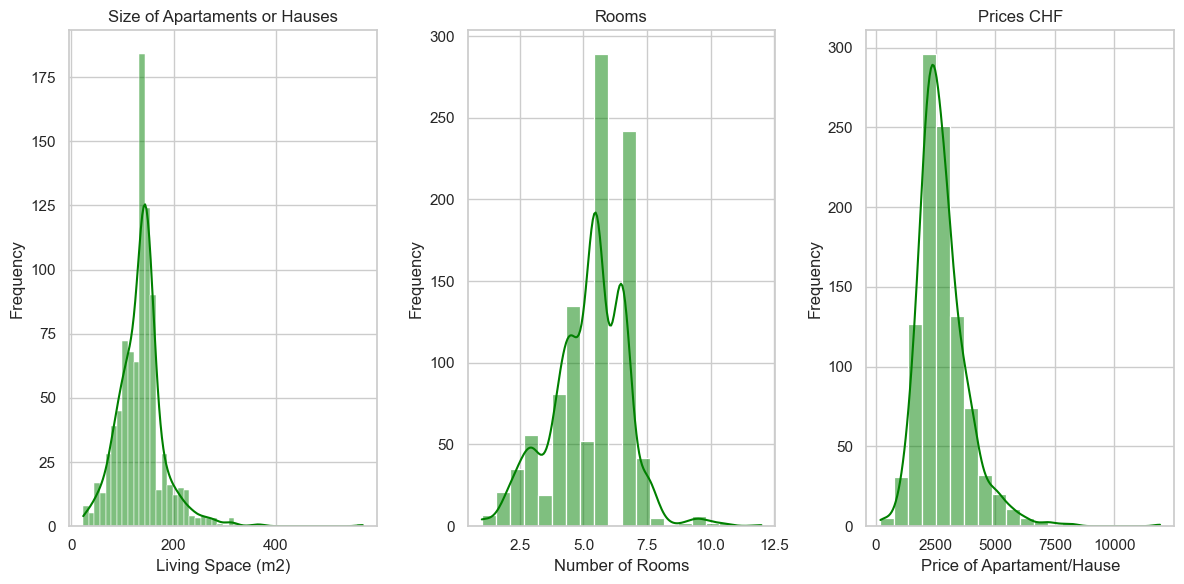

In [149]:
plt.figure(figsize=(12,6))
# 1. Histogram "Sizes"
plt.subplot(1, 3, 1)
sns.histplot(df['sizes'], kde=True, bins=50, color="green")
plt.xlabel("Living Space (m2)")
plt.ylabel("Frequency")
plt.title("Size of Apartaments or Hauses")

# Histogram "Rooms"
plt.subplot(1, 3, 2)
sns.histplot(df['rooms'], kde=True, bins=20, color="green")
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")
plt.title("Rooms")

#Histogram "Pices"
plt.subplot(1, 3, 3)
sns.histplot(df['prices'], kde=True, bins=20, color="green")
plt.title("Prices CHF")
plt.xlabel("Price of Apartament/Hause")
plt.ylabel("Frequency")

# Show Graph
plt.tight_layout()
plt.show()

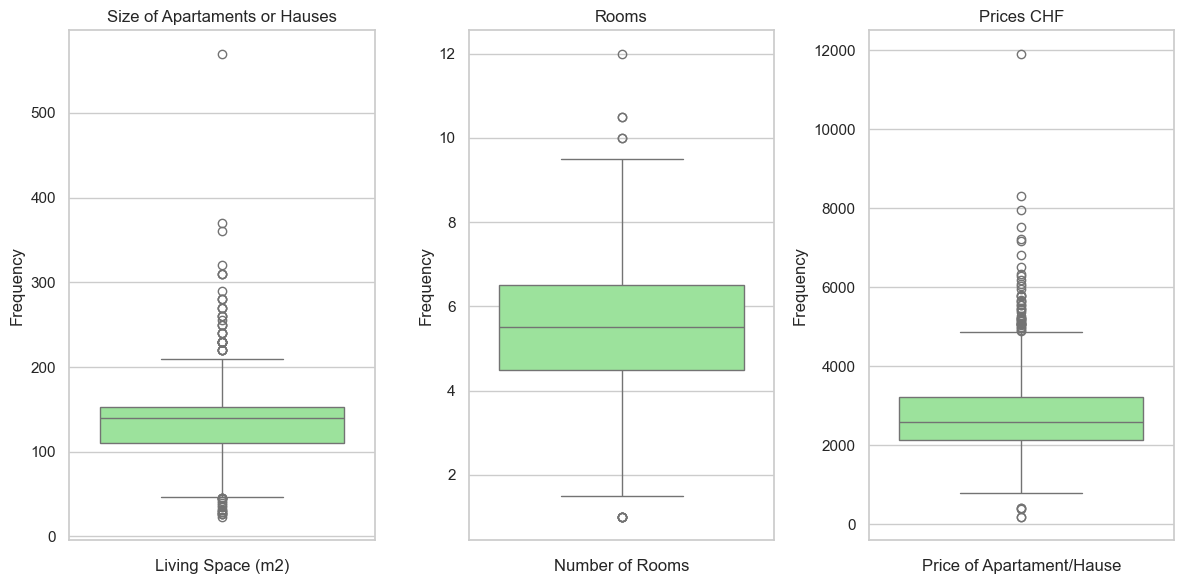

In [158]:
### Boxplot

plt.figure(figsize=(12, 6))

### Sizes or Living Space
plt.subplot(1, 3, 1)
sns.boxplot(y=df['sizes'], color='lightgreen')
plt.xlabel("Living Space (m2)")
plt.ylabel("Frequency")
plt.title("Size of Apartaments or Hauses")

### Number of Rooms
plt.subplot(1, 3, 2)
sns.boxplot(y=df['rooms'], color='lightgreen')
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")
plt.title("Rooms")

### Prices (CHF)
plt.subplot(1, 3, 3)
sns.boxplot(y=df['prices'], color='lightgreen')
plt.title("Prices CHF")
plt.xlabel("Price of Apartament/Hause")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 5. Multivariate Analysis

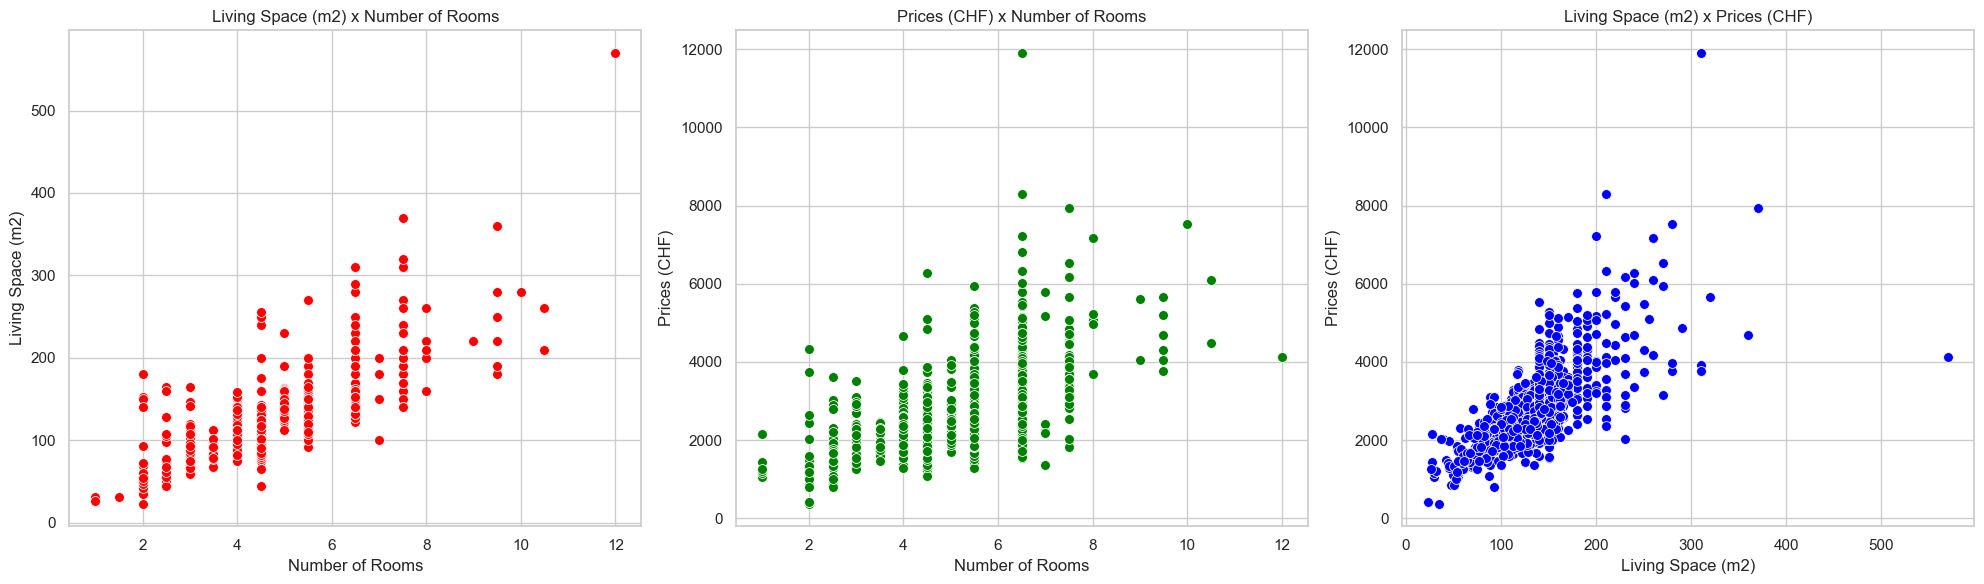

In [280]:
new_df = df[['sizes', 'rooms', 'prices']]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(data=new_df, x=new_df['rooms'], y=new_df['sizes'], s=50, c="red", ax=axs[0])
axs[0].set_title('Living Space (m2) x Number of Rooms')
axs[0].set_xlabel('Number of Rooms')
axs[0].set_ylabel('Living Space (m2)')

sns.scatterplot(data=new_df, x=new_df['rooms'], y=new_df['prices'], s=50, c="green", ax=axs[1])
axs[1].set_title('Prices (CHF) x Number of Rooms')
axs[1].set_xlabel('Number of Rooms')
axs[1].set_ylabel('Prices (CHF)')

sns.scatterplot(data=new_df, x=new_df['sizes'], y=new_df['prices'], s=50, c="blue", ax=axs[2])
axs[2].set_title('Living Space (m2) x Prices (CHF)')
axs[2].set_xlabel('Living Space (m2)')
axs[2].set_ylabel('Prices (CHF)')

plt.tight_layout()
plt.show()

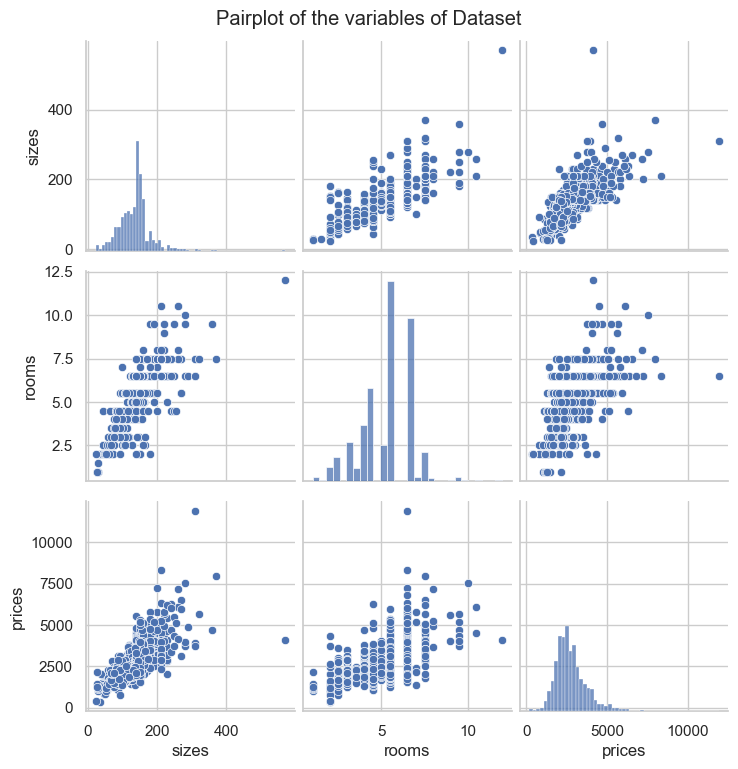

In [271]:
sns.pairplot(new_df)
plt.suptitle('Pairplot of the variables of Dataset', y=1.02)
plt.show()

##### 5.1 Correlation between variables

In [273]:
new_df.corr()

,sizes,rooms,prices
sizes,1.000000,0.762810,0.704294
rooms,0.762810,1.000000,0.572466
prices,0.704294,0.572466,1.000000


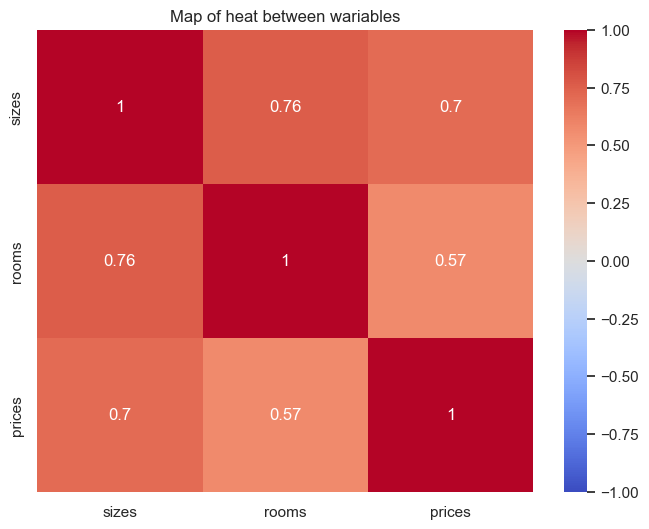

In [284]:
plt.figure(figsize=(8, 6))
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Map of heat between wariables')

plt.show()

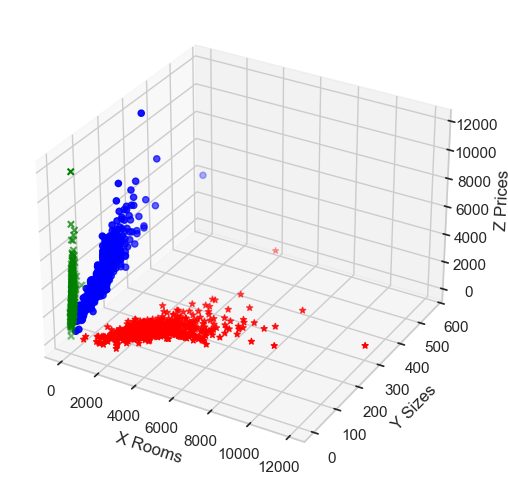

In [332]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    new_df['rooms'],
    new_df['sizes'],
    new_df['prices'],
    c='blue',
    marker='o',
)

scatter = ax.scatter(
    new_df['sizes'],
    new_df['rooms'],
    new_df['prices'],
    c='green',
    marker='x',
)

scatter = ax.scatter(
    new_df['prices'],
    new_df['sizes'],
    new_df['rooms'],
    c='red',
    marker='*',
)

ax.set_xlabel('X Rooms')
ax.set_ylabel('Y Sizes')
ax.set_zlabel('Z Prices')

plt.show()